In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
120,36,75000,0
190,24,84000,0
171,34,115000,0
175,23,28000,0
138,28,59000,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),
                                               df['Purchased'],
                                               test_size=0.3,
                                               random_state=0)
print(X_train,X_test,Y_train,Y_test)


     Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]      Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
216   49            65000
259   45           131000
49    31            89000
238   46            82000
343   47            51000

[120 rows x 2 columns] 92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64 132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train) # app mean lai rahai ho dono columns ka
#basically app X_train sai seekhtai ho kai values kesi hain
X_train_sc=sc.transform(X_train)# app formula apply kar rahai ho
X_test_sc=sc.transform(X_test)

In [14]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

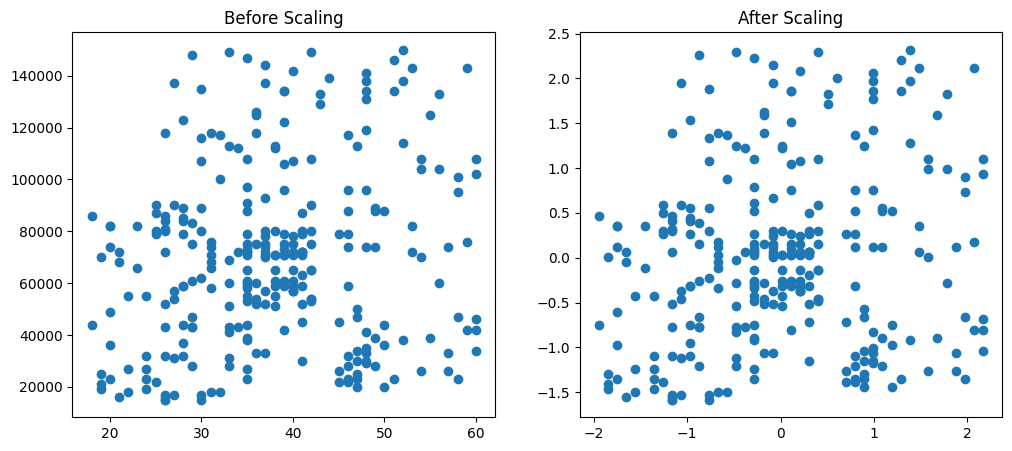

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_sc['Age'],X_train_sc['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()


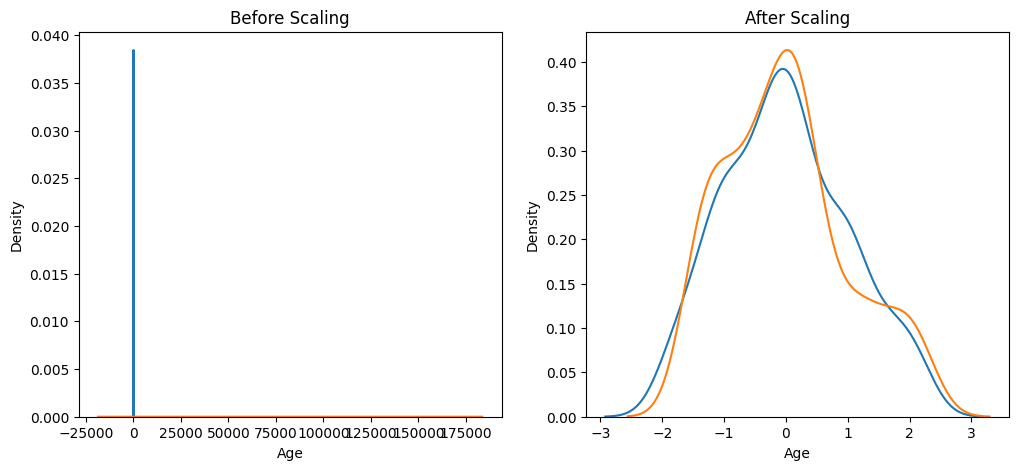

In [23]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc['Age'],ax=ax2)
sns.kdeplot(X_train_sc['EstimatedSalary'],ax=ax2)
plt.show()


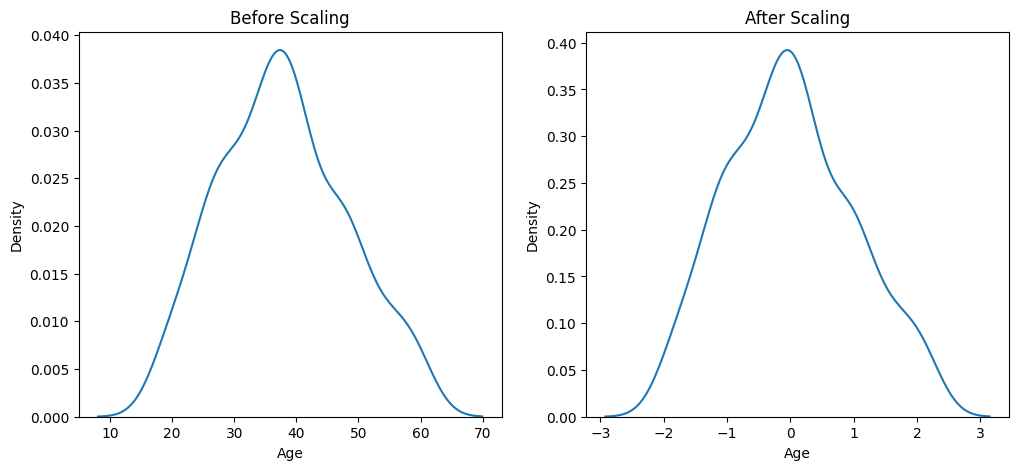

In [24]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc['Age'],ax=ax2)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [26]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_sc,Y_train)

LogisticRegression()

In [27]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_sc)

In [29]:
from sklearn.metrics import accuracy_score


In [30]:
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
print('Scaled Accuracy Score:',accuracy_score(Y_test,y_pred_scaled))

Accuracy Score: 0.875
Scaled Accuracy Score: 0.8666666666666667


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [33]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_sc,Y_train)

DecisionTreeClassifier()

In [34]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_sc)

In [38]:
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
print('Scaled Accuracy Score:',accuracy_score(Y_test,y_pred_scaled))


Accuracy Score: 0.875
Scaled Accuracy Score: 0.8666666666666667


In [43]:
df.describe()


,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


In [50]:
df = pd.concat([df,pd.DataFrame({'Age':[3,90,98],'EstimatedSalary':[999,250000,350002],'Purchased':[1,0,1]})],ignore_index=True)

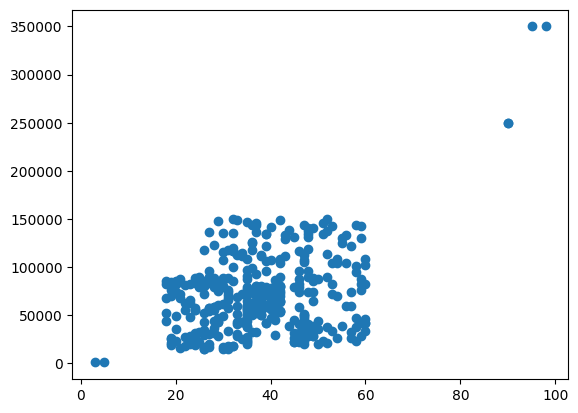

In [51]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [52]:
X_test,X_train,y_test,y_train=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_test)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [54]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

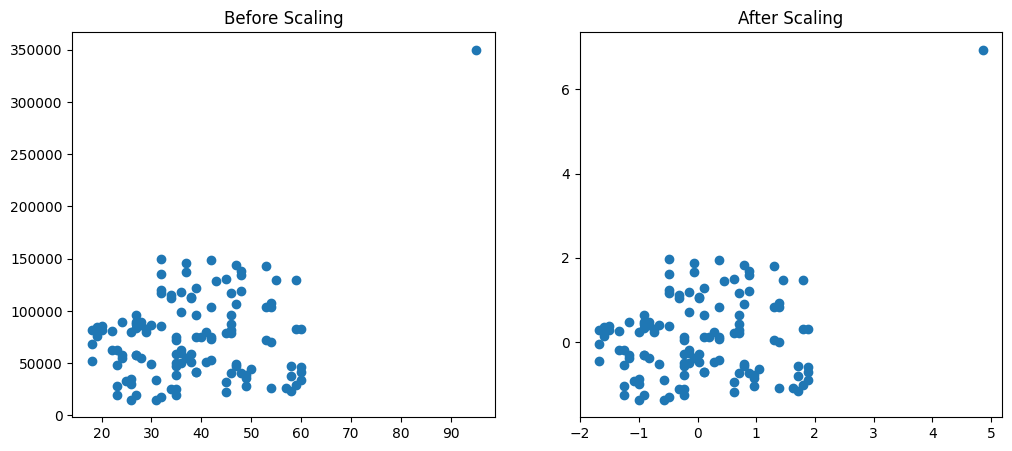

In [55]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_sc['Age'],X_train_sc['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()